#### Name: Tharun reddy yerva
#### Email: yervas9550@gmail.com


# Learning Activations in Neural Networks

Before going to learn about activation functions first we see what is a simple neural network and where exactly we use activation function.

#### Neural network:

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature

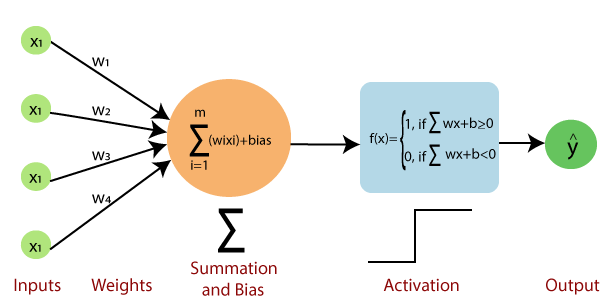

consider a example with single feature(x). from the simple linear regression we know Y = Mx + C (where, m,c are weights, constant or bias we add to make data linear). in feed forward neural network 1st we calculate mx+c value here activation function comes picture to give output value.



## What is Activation Function:

An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

### Types of Activation Functions:

The Activation Functions can be basically divided into 2 types-

1. Linear Activation Function

2. Non-linear Activation Functions

#### 1. Linear or Identity Activation Function

linear activation function is also called “identity” (multiplied by 1.0) or “no activation.”

This is because the linear activation function does not change the weighted sum of the input in any way and instead returns the value directly.

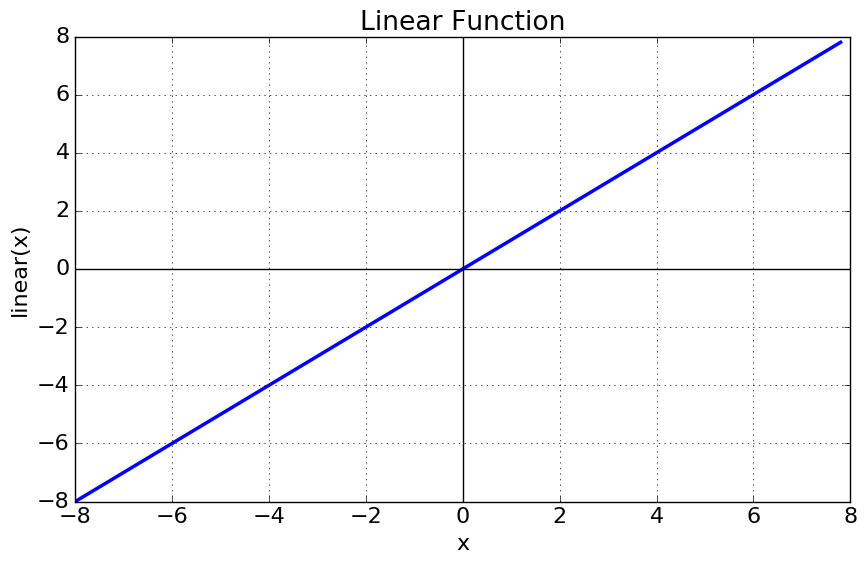

As you can see the function is a line or linear. Therefore, the output of the functions will not be confined between any range.

Equation : f(x) = x

Range : (-infinity to infinity)

It doesn’t help with the complexity or various parameters of usual data that is fed to the neural networks.

#### 2. Non-linear Activation Function

The Nonlinear Activation Functions are the most used activation functions. Nonlinearity helps to makes the graph look something like this

Derivative or Differential: Change in y-axis w.r.t. change in x-axis.It is also known as slope.

Monotonic function: A function which is either entirely non-increasing or non-decreasing.

##### 2.1 Sigmoid or Logistic Activation Function

The Sigmoid Function curve looks like a S-shape.

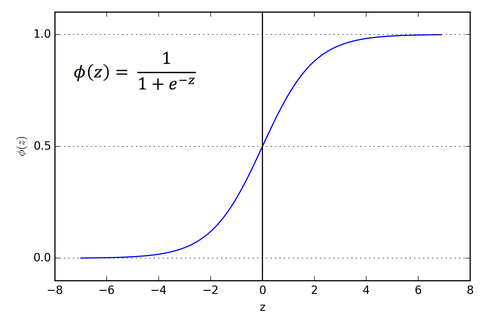

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.derivate of sigmoid function lies between 0 to 0.25

Range: (0 to 1)

Derivative Range: 0 to 0.25

Advantage: the main advantage of sigmoid is its fixed range(o to 1).so we can easily use for classification problems like yes or no, 0 or 1

Disadvantage : Vanishing Gradient problem. this occurs because the derivate of sigmoid function falls between 0 to 0.25. while updation of weights during back propagation in deep neural networks (new weights = old weight+ learning rate* derivate of loss function w.r.t perticular weight of neuron) after some max iterations the new weights almost equals to old weights(new == old weight) so weight  not updated in such way that loss function is reduced.

* computation power require more 


#### 2.2 Tanh or hyperbolic tangent Activation Function or threshold activation function

Historically, the tanh function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks. But it did not solve the vanishing gradient problem that sigmoids suffered, which was tackled more effectively with the introduction of ReLU activations.

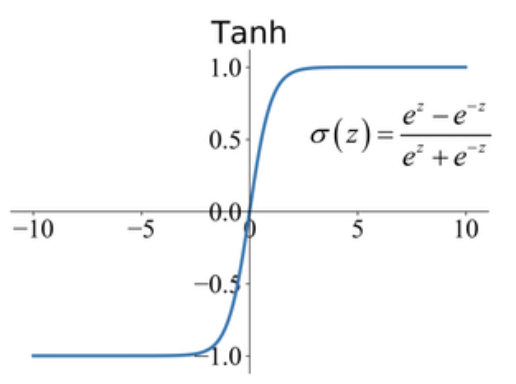

The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).derivate of tanh lies between 0 to less than 1

Range: (-1 to 1)

Derivate : (0 to 1)

Advantage: compare to sigmoid it gives more optimesed solutions.

Disadvantages: vanishing gradient problem same as sigmoid

* computation power require more 


#### 2.3 ReLU (Rectified Linear Unit) Activation Function

ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x).The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deelearning.derivate of z>0 it is 1, z<0 it is 0 it have only two values.

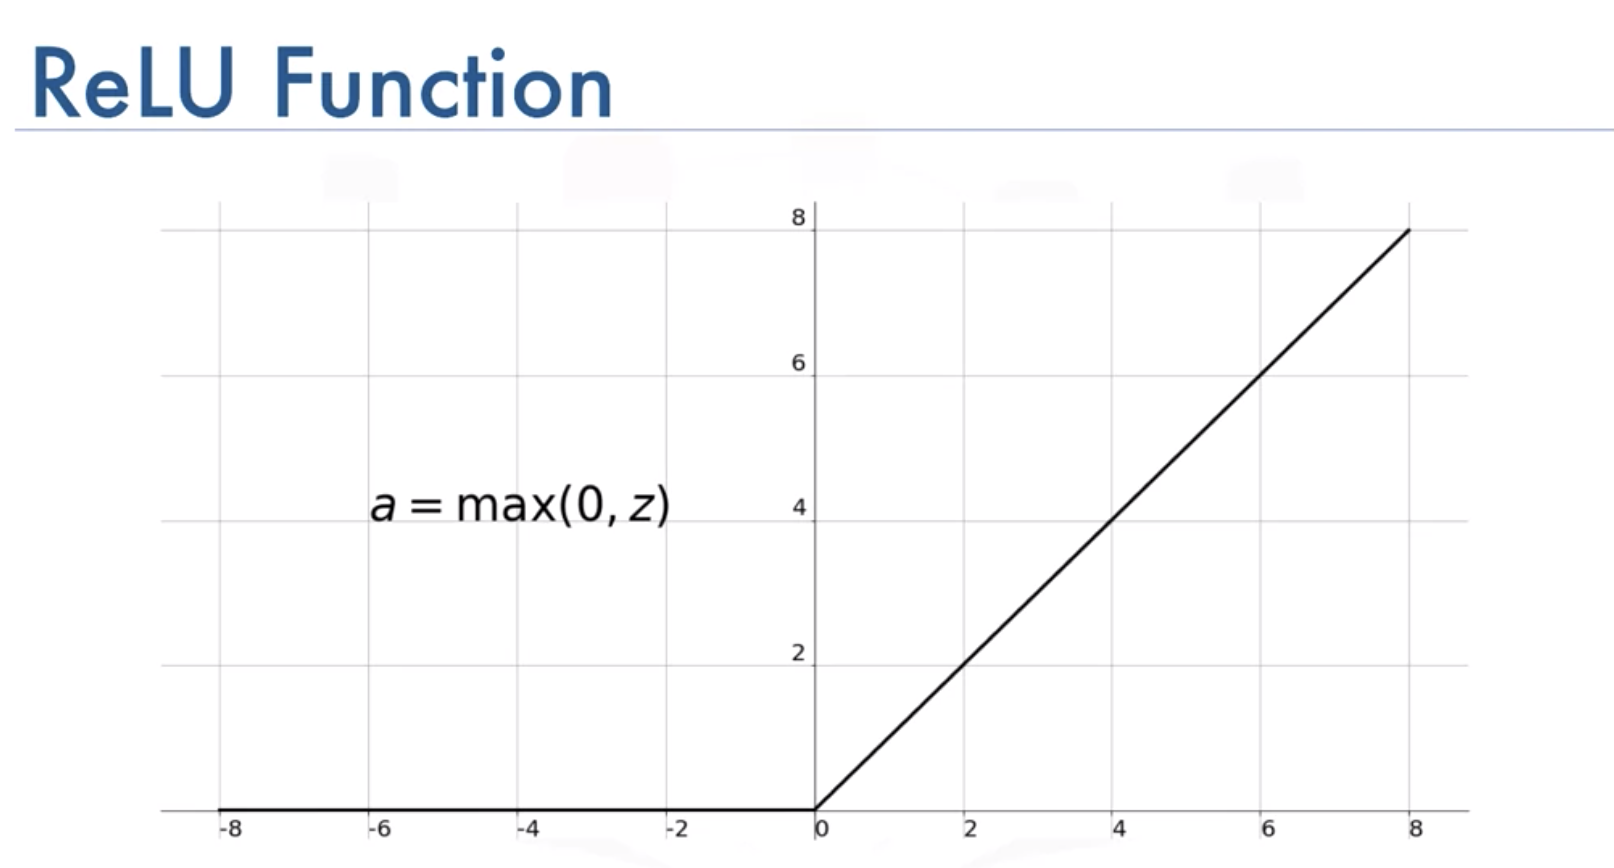

Range: 0 to infinity

Derivate range: max(0, 1) Z>0 it is 1, Z<0 it is 0.

Advantages: it solves problem of Vanshing Gradient Problem

Disadvantage: problem with dead neurons, this happens because  if z<0 the derivative become 0, new calculated weight equals to old weight this neuron called dead neuron.in order to fix this we use leaky ReLU.

#### Leaky ReLU

Leaky ReLU function is an improved version of the ReLU activation function. As for the ReLU activation function, the gradient is 0 for all the values of inputs that are less than zero, which would deactivate the neurons in that region and may cause dying ReLU problem.

Leaky ReLU is defined to address this problem. Instead of defining the ReLU activation function as 0 for negative values of inputs(x), we define it as an extremely small linear component of x. Here is the formula for this activation function
f(x)=max(0.01*x , x).

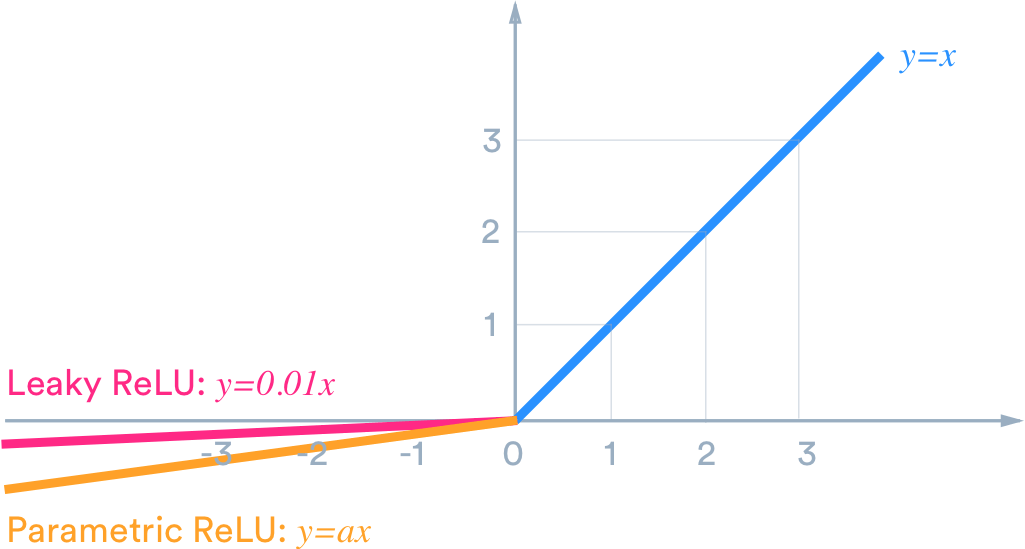

range: (-infinity to infinity)

Derivative Range: (0.01*X, 1)

Advantages: problem of dead neuron solved

Disadvasntage: Unlike PReLU, the coefficient of x is predefined and the Neural Network doesn’t decide the coefficient itself.

#### ELU:

Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.

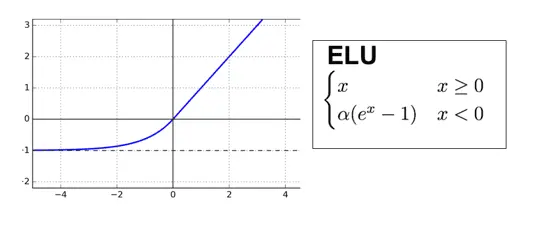

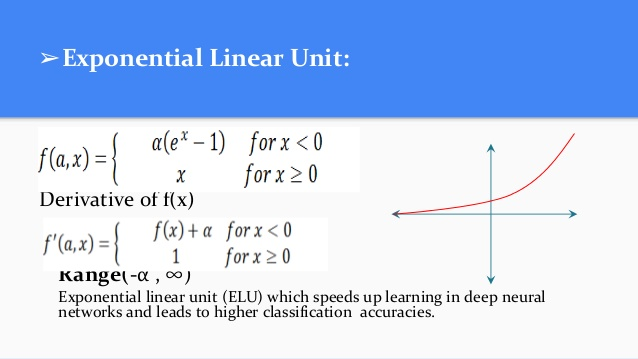

Range: (-infinity to + infinity)


Advantages: 1. Doesn’t have the dying ReLU problem.

2. The function tends to converge cost to zero faster and produces more accurate results(recently read it on a blog).

3. More of a merger between good features of ReLU & Leaky ReLU.

Disadvantages:  computation power require more because calculating exponential terms for each and every neuron requires more computation power.


#### Softmax:

Softmax is an activation function that scales numbers/logits into probabilities. The output of a Softmax is a vector (say v) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes.

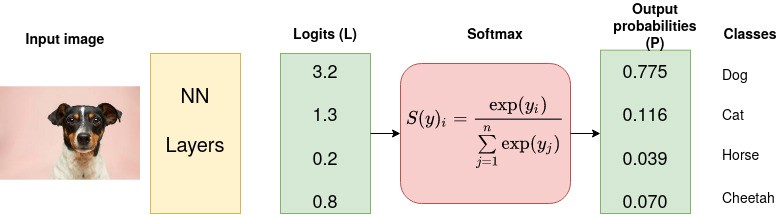

Advantages:

Used in multiple classification logistic regression model.
In building neural networks softmax functions used in different layer level.

# Performance of  'sigmoid', 'tanh', 'Relu', 'Leaky Relu' AND 'Elu' on MNIST DATASET

* in this for every activation function we are going to calculate train vs test loss, train and test accuracy, F1-Score, plot of the loss function vs. epochs.

* test: we are using 6 layers neural network with 4 hidden layers,input and output layers, with any normalization,drop out techniques,default weight initialization techniques.optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], 50 epochs





# model building with activation functions sigmoid,tanh,relu,leakyrelu,elu

### importing required libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras  import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.utils import np_utils
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from tensorflow.keras.metrics import Metric



In [61]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")# loading the mnist data

num_classes = 10
input_shape = (28, 28, 1)

x_train = x_train.astype("float32") / 255 # scaling image to [0 to 1] range
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [64]:
activation_function = ['sigmoid', 'tanh', 'relu', 'elu'] # list of Activation functions considered


## testing model with 6 layers

Epoch 1/50
1875/1875 [==============================] - 47s 24ms/step - loss: 1.9440 - accuracy: 0.2910 - val_loss: 0.2755 - val_accuracy: 0.9226
Epoch 2/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3840 - accuracy: 0.8929 - val_loss: 0.1566 - val_accuracy: 0.9518
Epoch 3/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2596 - accuracy: 0.9246 - val_loss: 0.1305 - val_accuracy: 0.9592
Epoch 4/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2054 - accuracy: 0.9397 - val_loss: 0.1128 - val_accuracy: 0.9659
Epoch 5/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1838 - accuracy: 0.9464 - val_loss: 0.1041 - val_accuracy: 0.9687
Epoch 6/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1669 - accuracy: 0.9499 - val_loss: 0.0927 - val_accuracy: 0.9727
Epoch 7/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1545 - accuracy: 0.9527 - val_loss: 0.0886 -

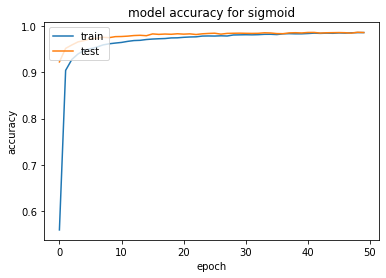

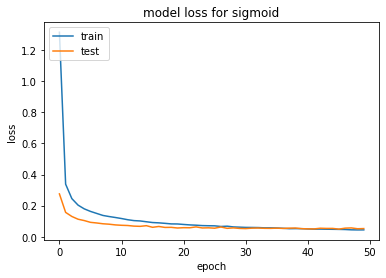

Epoch 1/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.5653 - accuracy: 0.8299 - val_loss: 0.0871 - val_accuracy: 0.9729
Epoch 2/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1446 - accuracy: 0.9573 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 3/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1132 - accuracy: 0.9661 - val_loss: 0.0704 - val_accuracy: 0.9773
Epoch 4/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0536 - val_accuracy: 0.9839
Epoch 5/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0884 - accuracy: 0.9725 - val_loss: 0.0591 - val_accuracy: 0.9830
Epoch 6/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0803 - accuracy: 0.9757 - val_loss: 0.0549 - val_accuracy: 0.9842
Epoch 7/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0588 -

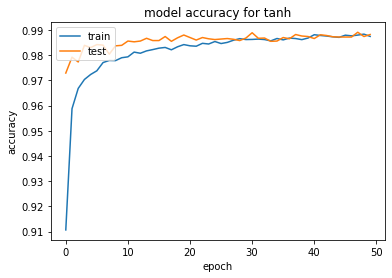

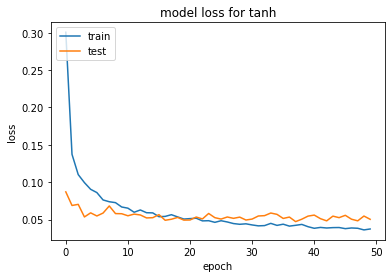

Epoch 1/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8171 - accuracy: 0.7280 - val_loss: 0.0981 - val_accuracy: 0.9692
Epoch 2/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2077 - accuracy: 0.9378 - val_loss: 0.0755 - val_accuracy: 0.9767
Epoch 3/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1517 - accuracy: 0.9537 - val_loss: 0.0617 - val_accuracy: 0.9810
Epoch 4/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1208 - accuracy: 0.9643 - val_loss: 0.0567 - val_accuracy: 0.9835
Epoch 5/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1068 - accuracy: 0.9692 - val_loss: 0.0525 - val_accuracy: 0.9859
Epoch 6/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0890 - accuracy: 0.9733 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 7/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0875 - accuracy: 0.9731 - val_loss: 0.0460 -

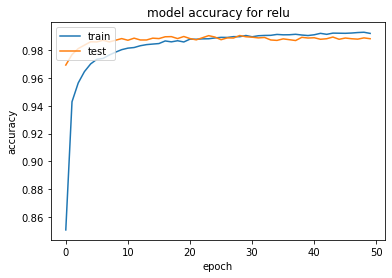

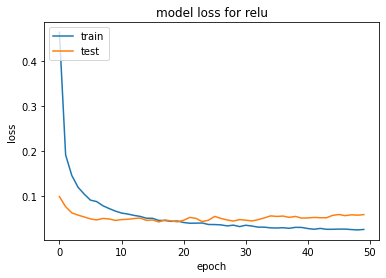

Epoch 1/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5506 - accuracy: 0.8262 - val_loss: 0.0809 - val_accuracy: 0.9744
Epoch 2/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1358 - accuracy: 0.9593 - val_loss: 0.0576 - val_accuracy: 0.9834
Epoch 3/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1045 - accuracy: 0.9685 - val_loss: 0.0505 - val_accuracy: 0.9852
Epoch 4/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0925 - accuracy: 0.9709 - val_loss: 0.0573 - val_accuracy: 0.9832
Epoch 5/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0835 - accuracy: 0.9748 - val_loss: 0.0537 - val_accuracy: 0.9851
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 7/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0490 -

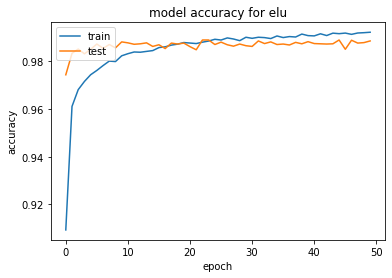

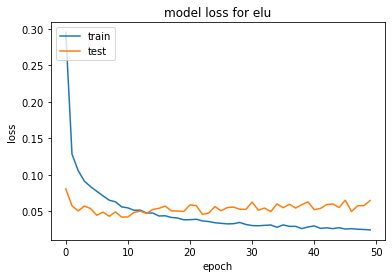

In [63]:
for i in activation_function: # for every iteration activation function changes and gives required output

    model = Sequential() # initializing the sequential model

    model.add(Conv2D(32, kernel_size=(3, 3), activation= i, input_shape = (28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation= i))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation= i))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = i ))
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# complailing the model
    
    history = model.fit(x_train, y_train, epochs= 50, validation_data=(x_test, y_test), shuffle=True) # fittinh model for train,test

    score = model.evaluate(x_test, y_test, verbose=0) # calculating scores
  
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    plt.plot(history.history['accuracy'])# accuracy plot for train,test data set
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy for'+' ' + i)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])# loss plot for train,test
    plt.plot(history.history['val_loss'])
    plt.title('model loss for'+' '+i )
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Final Report:

Above model is tested with 4 different activation functions 1.Sigmoid, 2.Tanh, 3.Relu, 4.Elu. for the mnist data set all this activation functions performed very well all activation function almost got same accuracy and minimal loss.

##### from traing graph

#### Sigmoid: 

by using sigmoid activation function the loss of model starts decreasing from 4 epoch and got minimum value at 25 to 40 epochs and accuracy starts increasing from 2 epoch and got maximum accuracy at 30 epoch and average time for epoch is 46 seconds, total is 46*50 epoch= 38.33 min

*  Accuracy got max at : 30 epochs

* Loss got minimum value at : 40 epoch

* Total time for 50 epochs: 2300 sec= 38.33 min

#### Tanh:

for the tanh accuracy start increasing from 3 epoch and got maximum at 35 epochs also got zigzag line, loss decreasing from 4 epoch and got minimum at like 28 epoch. average time for epochs is 34 seconds and total time is 28 mins

* Accuracy got max at: 35

* loss got min at : 28

* total time: 28 min

#### Relu:

for relu accuray starts incresing from 4 epoch and got max at 25 epoch and loss start decresing from 6 epoch and got min loss at 35 epoch. avg time for 1 epoch is 26 seconds total time is 21.66 min

* Accuracy got max at: 25 epoch

* loss got min at : 35 epoch

* total time : 21 min

#### Elu:

for the elu accuracy starts increasing from 4 epoch got max at 40 epoch , loss start decreasing from 5 epoch and got minimum at 40 epoch.time for single epoch is 32 seconds and total time is 27 min.

* Accuracy got max at : 40

* Loss got min at : 40

* total time: 27 min

## Conclusion:

When you look into deep, parameters like time taken for claculations,complexity of math behind activation function, at what epoch we got high accuracy how minimum loss we got with constant line. 'Relu' got very less total time 21 min , accuracy got maximum at 25 and 'tanh' got min loss at 28 epoch. over all Relu perform very well.

Finally i am concluding that 'Relu' is work very well with hidden layes, for output layer for single label image classification 'sigmoid' work very good and for multi class labels 'softmax' work very well.

